### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading Data

In [2]:
data = pd.read_csv("data_3_2.csv")

In [3]:
data.head()

,x1,x2,class
0,10.52,0.65,3
1,1.46,-1.25,2
2,1.50,0.56,2
3,-1.36,2.50,0
4,11.16,5.19,1


In [4]:
data.shape

(300, 3)

### Visualizing Data

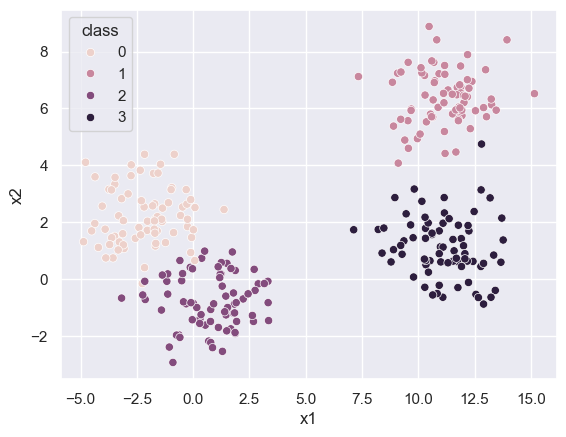

In [5]:
sns.scatterplot(data=data, x='x1', y='x2', hue='class')
plt.show()

### Separate X and y

In [6]:
data_arr = data.to_numpy()

X = data_arr[:, :-1]
y = data_arr[:, -1]

### Scale X

In [7]:
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [8]:
X_scaled[:5]

array([[ 0.8556243 , -0.56512639],
       [-0.61138228, -1.24532581],
       [-0.60490542, -0.59734636],
       [-1.06800021,  0.09717305],
       [ 0.9592539 ,  1.06019223]])

### Numpy to Tensor

In [31]:
import torch 
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

### Concate X

In [32]:
X_new = torch.cat((torch.ones(X_tensor.size(0), 1), X_tensor), dim=1)

In [33]:
X_new[:5]

tensor([[ 1.0000,  0.8556, -0.5651],
        [ 1.0000, -0.6114, -1.2453],
        [ 1.0000, -0.6049, -0.5973],
        [ 1.0000, -1.0680,  0.0972],
        [ 1.0000,  0.9593,  1.0602]])

In [55]:
y_all = []
for i in range(4):
    y_tem = y_tensor.clone()
    y_tem[y_tensor==i] = 1
    y_tem[y_tensor!=i] = 0
    y_all.append(y_tem)
print(len(y_all))
print(len(y_all[3]))

4
300


In [56]:
ty = torch.concat(y_all, dim=1)
print(ty[:5])
print(ty.size())

tensor([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]])
torch.Size([300, 4])


In [21]:
ty[:5]

tensor([[3., 3., 3., 3.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.]])

### Modeling

In [22]:
def hyp(X, theta):
    return torch.softmax(torch.matmul(X, theta), dim=1)

### Training

In [41]:
import torch.nn as nn
import torch.optim as optim

theta = torch.zeros((3, 4), dtype=torch.float32, requires_grad=True)
cost_func = nn.CrossEntropyLoss()
optimizer = optim.SGD([theta], lr=10)
epochs = 500

for epoch in range(epochs):
    h = hyp(X_new, theta)
    cost = cost_func(h, ty)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f"Epoch: {epoch+1:03d} Cost: {cost.item():.4f}")

Epoch: 001 Cost: 1.3863
Epoch: 002 Cost: 1.1180
Epoch: 003 Cost: 0.9832
Epoch: 004 Cost: 0.9185
Epoch: 005 Cost: 0.8857
Epoch: 006 Cost: 0.8655
Epoch: 007 Cost: 0.8518
Epoch: 008 Cost: 0.8417
Epoch: 009 Cost: 0.8340
Epoch: 010 Cost: 0.8278
Epoch: 011 Cost: 0.8228
Epoch: 012 Cost: 0.8185
Epoch: 013 Cost: 0.8149
Epoch: 014 Cost: 0.8118
Epoch: 015 Cost: 0.8091
Epoch: 016 Cost: 0.8067
Epoch: 017 Cost: 0.8046
Epoch: 018 Cost: 0.8027
Epoch: 019 Cost: 0.8009
Epoch: 020 Cost: 0.7994
Epoch: 021 Cost: 0.7979
Epoch: 022 Cost: 0.7966
Epoch: 023 Cost: 0.7954
Epoch: 024 Cost: 0.7942
Epoch: 025 Cost: 0.7932
Epoch: 026 Cost: 0.7922
Epoch: 027 Cost: 0.7913
Epoch: 028 Cost: 0.7905
Epoch: 029 Cost: 0.7897
Epoch: 030 Cost: 0.7889
Epoch: 031 Cost: 0.7882
Epoch: 032 Cost: 0.7875
Epoch: 033 Cost: 0.7869
Epoch: 034 Cost: 0.7863
Epoch: 035 Cost: 0.7857
Epoch: 036 Cost: 0.7852
Epoch: 037 Cost: 0.7846
Epoch: 038 Cost: 0.7841
Epoch: 039 Cost: 0.7837
Epoch: 040 Cost: 0.7832
Epoch: 041 Cost: 0.7828
Epoch: 042 Cost:

In [46]:
h = hyp(X_new, theta)
y_pred = torch.argmax(h, dim=1)
y_pred = y_pred.reshape(-1, 1)
accuracy = (y_pred==y_tensor).sum().item() / y_tensor.size(0)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 98.67%
